In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-11-24 14:12:58--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.002s  

2024-11-24 14:12:59 (31.5 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


Preprocessing data

In [3]:
healthDf = dataset.copy()

feature_columns = {}
for col_name in healthDf.columns:
  if(healthDf[col_name].dtype == 'object'):
      c = healthDf[col_name].astype('category')
      healthDf[col_name] = c.cat.codes
      feature_columns[col_name] = dict(enumerate(c.cat.categories))

healthDf.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95
1337,61,0,29.1,0,1,1,29141.36


In [4]:
#encodings dict
feature_columns

{'sex': {0: 'female', 1: 'male'},
 'smoker': {0: 'no', 1: 'yes'},
 'region': {0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'}}

Splitting data

In [5]:
train_features = healthDf.sample(frac=0.8, random_state=0)
test_features = healthDf.drop(train_features.index)
train_dataset = train_features.copy()
test_dataset = test_features.copy()

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

# Build data normalizer
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))

Creating model

In [6]:
def createModel(normalizer):
  model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['mae', 'mse'])
  return model

model = createModel(normalizer)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (1070, 6)                   │              13 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

Training model

In [7]:
history = model.fit(
    train_dataset,
    train_labels,
    validation_split=0.2,
    verbose=1,
    epochs=150
)

Epoch 1/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 12796.5156 - mae: 12796.5156 - mse: 307461088.0000 - val_loss: 14427.3965 - val_mae: 14427.3945 - val_mse: 363293184.0000
Epoch 2/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11846.2617 - mae: 11846.2617 - mse: 266303392.0000 - val_loss: 14423.2686 - val_mae: 14423.2686 - val_mse: 363165760.0000
Epoch 3/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12168.5938 - mae: 12168.5938 - mse: 273758976.0000 - val_loss: 14414.9111 - val_mae: 14414.9111 - val_mse: 362911584.0000
Epoch 4/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13013.2100 - mae: 13013.2100 - mse: 312139328.0000 - val_loss: 14399.7939 - val_mae: 14399.7939 - val_mse: 362458912.0000
Epoch 5/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13192.3223 - mae: 13192.3223 - mse: 315150592.0000 - val_loss: 14374.9102 - val_mae: 14374.9102 - val_mse: 361717248.0000
Epoch 6/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12813.8057 - mae: 12813.8057 - mse:

9/9 - 0s - 4ms/step - loss: 3328.8933 - mae: 3328.8933 - mse: 47264676.0000
Testing set Mean Abs Error: 3328.89 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


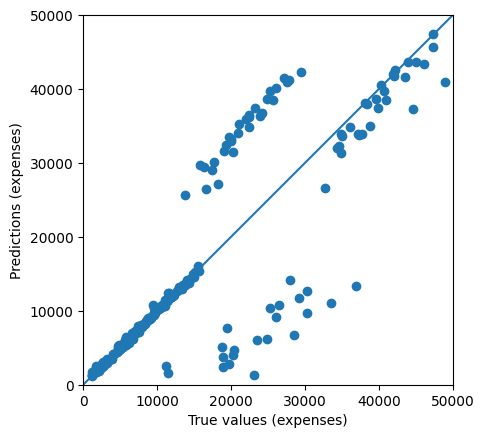

In [8]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)